# Weighted k-NN 
### Read data

Read data using `pandas`

In [2]:
import pandas

training_data = pandas.read_csv("auto_train.csv")
print(training_data.head())
test_data = pandas.read_csv("auto_test.csv")
print(test_data.head())

   displacement  horsepower   mpg
0         307.0         130  18.0
1         350.0         165  15.0
2         318.0         150  18.0
3         304.0         150  16.0
4         302.0         140  17.0
   displacement  horsepower   mpg
0            89          71  31.9
1            86          65  34.1
2            98          80  35.7
3           121          80  27.4
4           183          77  25.4


### Plot the data
Plotted the data in the training set (with displacement on the horizontal axis, and mpg on the vertical axis).

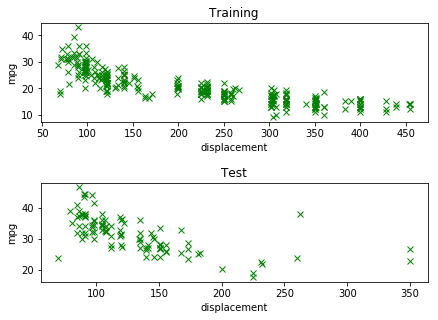

In [4]:
import matplotlib.pyplot as plt

x = training_data["displacement"]
y = training_data["mpg"]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)

ax1.set_title('Training')
ax1.set_xlabel('displacement')
ax1.set_ylabel('mpg')
ax1.plot(x, y, 'gx')

x_test = test_data["displacement"]
y_test = test_data["mpg"]

ax2.set_title('Test')
ax2.set_xlabel('displacement')
ax2.set_ylabel('mpg')
ax2.plot(x_test, y_test, 'gx')

### k-NN
Implemented k Nearest Neighbor from scratch. Using the data in the training set, predicted the output for each example in the test, for k = 1, k = 3, and k = 20. Reported the squared error Err on the test set.

In [6]:
from kNN import kNN

for k in [1, 3, 20]:
    classifier = kNN(x,y, k)
    pred_test = classifier.predict(x_test)

    test_error = mean_squared_error(y_test, pred_test)
    print("Test error with k={}: {}".format(k, test_error * len(y_test)/2))



Test error with k=1: 2868.0049999999997
Test error with k=3: 2794.729999999999
Test error with k=20: 2746.1914125


### Weighted k-NN
Instead of computing an average of the k neighbors, I computed a weighted average of the neighbors using a gaussian function to retrieve the weight for each neighbor.

In [7]:
from kNN import kNN

for k in [1, 3, 20]:
    classifier = kNN(x,y, k, weighted=True)
    pred_test = classifier.predict(x_test)

    test_error = mean_squared_error(y_test, pred_test)
    print("Test error with k={}: {}".format(k, test_error * len(y_test)/2))


Test error with k=1: 2868.005
Test error with k=3: 2757.3065023859417
Test error with k=20: 2737.9437262401907
